In [19]:
import numpy as np
import pandas as pd
# import some dependencies to visualization with altair
import altair as alt
alt.renderers.enable('notebook') # for the notebook only (not for JupyterLab) run this command once per session
from altair import datum

def draw_density_plot(distribution, distribution_name):
    # Create the points to draw the probability density function
    x_i = distribution.ppf(0.001)
    x_f = distribution.ppf(0.999)
    x = np.linspace(x_i, x_f, 100)
    f_x = distribution.pdf(x)
    
    # draw the density function f(x)
    data = pd.DataFrame({'x': x, 'f(x)': f_x})
    density = alt.Chart(data).mark_line().encode(
        x='x:Q',
        y='f(x):Q'
    ).properties(title='{0}'.format(distribution_name))
    
    return density

def draw_density_and_zscore_plot(distribution, distribution_name, z_score, z_score1, z_score2, draw_area=False, type_area='left_area'):
    
    density = draw_density_plot(distribution, distribution_name)
    
    #z_score_mark_rule = density.mark_rule(color='red').encode(
    #    x='z_score_value:Q',
    #    size=alt.value(1)
    #).transform_calculate(
    #    z_score_value=str(z_score)
    #)
    
    z_score1_mark_rule = density.mark_rule(color='red').encode(
        x='z_score_value:Q',
        size=alt.value(1)
    ).transform_calculate(
        z_score_value=str(z_score1)
    )
    
    #plot = density + z_score_mark_rule + z_score1_mark_rule
    plot = density + z_score1_mark_rule
    
    if draw_area:
        if type_area == 'left_area':
            predicate = alt.FieldLTEPredicate(field='x', lte=z_score)
        elif type_area == 'range_area':
            z_score_mark_rule2 = density.mark_rule(color='red').encode(
                x='z_score_value:Q',
                size=alt.value(1)
            ).transform_calculate(
                z_score_value=str(-z_score)
            )
            
            #plot = density + z_score_mark_rule + z_score1_mark_rule + z_score_mark_rule2
            plot = density + z_score1_mark_rule + z_score_mark_rule2

            predicate = alt.FieldRangePredicate(
                field='x', 
                range=[(z_score if z_score < 0 else -z_score), (z_score if z_score > 0 else -z_score)]
            )
        else:
            predicate = alt.FieldGTEPredicate(field='x', gte=z_score)
            
        z_score_mark_area = density.mark_area().encode(
            x='x:Q',
            y='f(x):Q'
        ).transform_filter(
            predicate
        )
        plot = plot + z_score_mark_area
        
        z_score2_mark_rule = density.mark_rule(color='red').encode(
            x='z_score_value:Q',
            size=alt.value(1)
        ).transform_calculate(
            z_score_value=str(z_score2)
        )
        
        plot = plot + z_score2_mark_rule
    
    return plot

In [20]:
from scipy import stats as st

m = 50
s = 10
standard_normal = st.norm(loc=m, scale=s)
distribution_name = "Normal(mean={0},sd={1})".format(m, s)

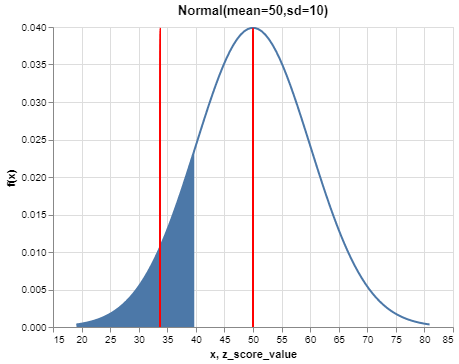

In [21]:
z1 = 40.0
z2 = 50.0
mean1 = 33.785961
draw_density_and_zscore_plot(standard_normal, distribution_name, z1, z2, mean1, True, 'left_area')

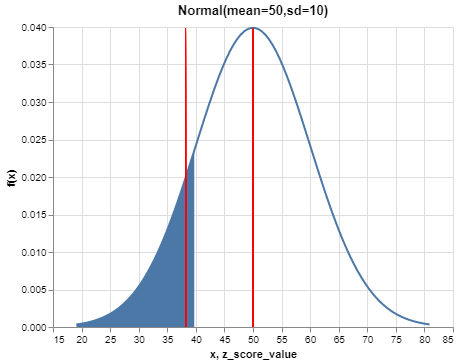

In [22]:
mean2 = 38.197916
draw_density_and_zscore_plot(standard_normal, distribution_name, z1, z2, mean2, True, 'left_area')